In [1]:
print('hello')

hello


<h1>contoh 1</h1>

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        20
         1.0       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



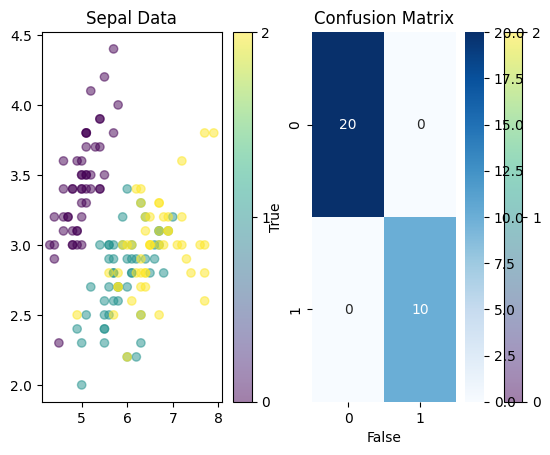

In [2]:
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

iris = load_iris()
X = iris.data[:, (0, 1)] # petal length, petal width
y = (iris.target == 0).astype(np.int_)
n_samples, n_features = iris.data.shape

plt.subplot(1, 2, 1)
scatter_plot = plt.scatter(iris.data[:,0], iris.data[:,1], alpha=0.5,c=iris.target)
plt.colorbar(ticks=([0, 1, 2]))
plt.title('Sepal Data')
plt.subplot(1, 2, 2)
scatter_plot_2 = plt.scatter(iris.data[:,2], iris.data[:,3], alpha=0.5, c=iris.target)
plt.colorbar(ticks=([0, 1, 2]))
plt.title('Petal Data')

#Model Perceptron
class Perceptron:
    def __init__(self, learning_rate, epochs):
        self.weights = None
        self.bias = None
        self.learning_rate = learning_rate
        self.epochs = epochs
        # heaviside activation function
    def activation(self, z):
        return np.heaviside(z, 0) # haviside(z) heaviside -> activation
    def fit(self, X, y):
        n_features = X.shape[1]
        # Initializing weights and bias
        self.weights = np.zeros((n_features))
        self.bias = 0
        # Iterating until the number of epochs
        for epoch in range(self.epochs):
        # Traversing through the entire training set
            for i in range(len(X)):
                z = np.dot(X, self.weights) + self.bias # Finding the dot product and adding the bias
                y_pred = self.activation(z) # Passing through an activation function
                #Updating weights and bias
                self.weights = self.weights + self.learning_rate * (y[i] -y_pred[i]) * X[i]
                self.bias = self.bias + self.learning_rate * (y[i] -y_pred[i])
        return self.weights, self.bias
    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        return self.activation(z)

#Prediction
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
perceptron = Perceptron(0.001, 100)
perceptron.fit(X_train, y_train)
pred = perceptron.predict(X_test)
accuracy_score(pred, y_test)
#Classification Report
from sklearn.metrics import classification_report
report = classification_report(pred, y_test, digits=2)
print(report)
from sklearn import metrics
from sklearn.metrics import confusion_matrix
#Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, pred)

sns.heatmap(conf_matrix, annot = True, cmap= 'Blues')
plt.ylabel('True')
plt.xlabel('False')
plt.title('Confusion Matrix')
plt.show()


<h1>contoh 2</h1>

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



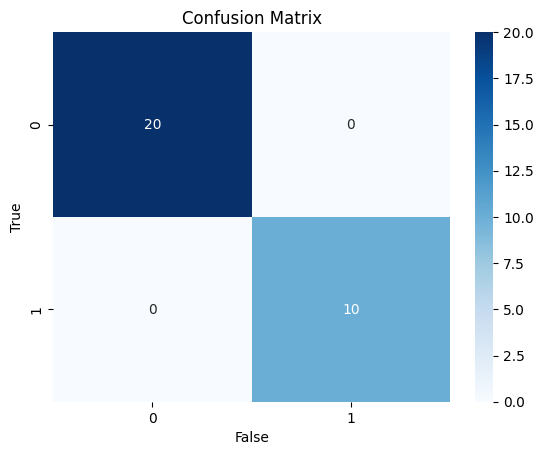

In [3]:
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sk_perceptron = Perceptron(max_iter=100,tol=0.001)
sk_perceptron.fit(X_train, y_train)
sk_perceptron_pred = sk_perceptron.predict(X_test)
# Accuracy
accuracy_score(sk_perceptron_pred, y_test)
from sklearn.metrics import classification_report
report = classification_report(sk_perceptron_pred, y_test, digits=2)
print(report)
from sklearn import metrics
from sklearn.metrics import confusion_matrix
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, sk_perceptron_pred)
sns.heatmap(conf_matrix, annot = True, cmap= 'Blues')
plt.ylabel('True')
plt.xlabel('False')
plt.title('Confusion Matrix')
plt.show()

<h1>contoh 3</h1>

In [4]:
import numpy as np
from sklearn import datasets
# load iris dataset
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)] # petal length, petal width
y = (iris["target"] == 2).astype(int) # 1 if Iris-Virginica, else 0
y = y.reshape([150,1])

def sigmoid(z):
    return 1 / (1 + np.exp(-z))
def sigmoid_derivative(z):
    s = sigmoid(z)
    return s * (1 - s)
    
class MLP:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.01):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate

        # initialize weights randomly
        self.weights1 = np.random.randn(self.input_size, self.hidden_size)
        self.weights2 = np.random.randn(self.hidden_size, self.output_size)

        # initialize biases to 0
        self.bias1 = np.zeros((1, self.hidden_size))
        self.bias2 = np.zeros((1, self.output_size))
    def fit(self, X, y, epochs=1000):
        for epoch in range(epochs):
            # feedforward
            layer1 = X.dot(self.weights1) + self.bias1
            activation1 = sigmoid(layer1)
            layer2 = activation1.dot(self.weights2) + self.bias2
            activation2 = sigmoid(layer2)

            # backpropagation
            error = activation2 - y
            d_weights2 = activation1.T.dot(error * sigmoid_derivative(layer2))
            d_bias2 = np.sum(error * sigmoid_derivative(layer2), axis=0, keepdims=True)
            error_hidden = error.dot(self.weights2.T) * sigmoid_derivative(layer1)
            d_weights1 = X.T.dot(error_hidden)
            d_bias1 = np.sum(error_hidden, axis=0, keepdims=True)

            # update weights and biases
            self.weights2 -= self.learning_rate * d_weights2
            self.bias2 -= self.learning_rate * d_bias2
            self.weights1 -= self.learning_rate * d_weights1
            self.bias1 -= self.learning_rate * d_bias1
    #Prediction
    def predict(self, X):
        layer1 = X.dot(self.weights1) + self.bias1
        activation1 = sigmoid(layer1)
        layer2 = activation1.dot(self.weights2) + self.bias2
        activation2 = sigmoid(layer2)
        return (activation2 > 0.5).astype(int)

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
# create an instance of the MLP class
mlp = MLP(input_size=2, hidden_size=7, output_size=1)
# train the MLP on the training data
mlp.fit(X_train, y_train)
# make predictions on the test data
y_pred = mlp.predict(X_test)
# evaluate the accuracy of the MLP
accuracy = np.mean(y_pred == y_test)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 1.00


<h1>contoh 4</h1>

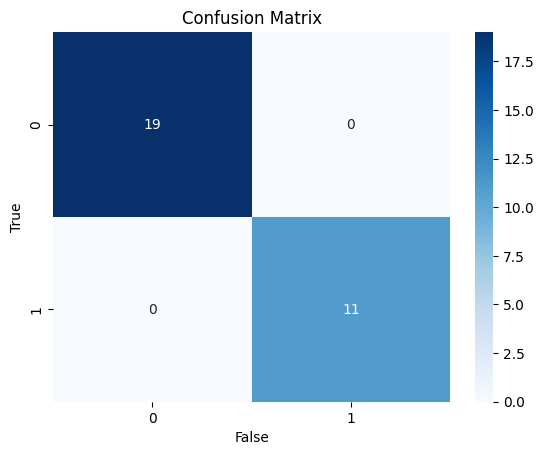

In [5]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix, annot = True, cmap= 'Blues')
plt.ylabel('True')
plt.xlabel('False')
plt.title('Confusion Matrix')
plt.show()


<h1>SLP soal 3</h1>

In [6]:
import pandas as pd
df = pd.read_csv("C:/Users/Thinkpad/Documents/ml_prak/Tugas_Mlprak_tm10/HomeC.csv", low_memory=False)
print(df.head())

         time  use [kW]  gen [kW]  House overall [kW]  Dishwasher [kW]  \
0  1451624400  0.932833  0.003483            0.932833         0.000033   
1  1451624401  0.934333  0.003467            0.934333         0.000000   
2  1451624402  0.931817  0.003467            0.931817         0.000017   
3  1451624403  1.022050  0.003483            1.022050         0.000017   
4  1451624404  1.139400  0.003467            1.139400         0.000133   

   Furnace 1 [kW]  Furnace 2 [kW]  Home office [kW]  Fridge [kW]  \
0        0.020700        0.061917          0.442633     0.124150   
1        0.020717        0.063817          0.444067     0.124000   
2        0.020700        0.062317          0.446067     0.123533   
3        0.106900        0.068517          0.446583     0.123133   
4        0.236933        0.063983          0.446533     0.122850   

   Wine cellar [kW]  ...  visibility  summary  apparentTemperature  pressure  \
0          0.006983  ...        10.0    Clear                29.26

In [7]:
# Check how many NaN values each column has
print(df.isna().sum())

time                   0
use [kW]               1
gen [kW]               1
House overall [kW]     1
Dishwasher [kW]        1
Furnace 1 [kW]         1
Furnace 2 [kW]         1
Home office [kW]       1
Fridge [kW]            1
Wine cellar [kW]       1
Garage door [kW]       1
Kitchen 12 [kW]        1
Kitchen 14 [kW]        1
Kitchen 38 [kW]        1
Barn [kW]              1
Well [kW]              1
Microwave [kW]         1
Living room [kW]       1
Solar [kW]             1
temperature            1
icon                   1
humidity               1
visibility             1
summary                1
apparentTemperature    1
pressure               1
windSpeed              1
cloudCover             1
windBearing            1
precipIntensity        1
dewPoint               1
precipProbability      1
dtype: int64


In [8]:
df.dropna(inplace=True)
print(df.isna().sum())

time                   0
use [kW]               0
gen [kW]               0
House overall [kW]     0
Dishwasher [kW]        0
Furnace 1 [kW]         0
Furnace 2 [kW]         0
Home office [kW]       0
Fridge [kW]            0
Wine cellar [kW]       0
Garage door [kW]       0
Kitchen 12 [kW]        0
Kitchen 14 [kW]        0
Kitchen 38 [kW]        0
Barn [kW]              0
Well [kW]              0
Microwave [kW]         0
Living room [kW]       0
Solar [kW]             0
temperature            0
icon                   0
humidity               0
visibility             0
summary                0
apparentTemperature    0
pressure               0
windSpeed              0
cloudCover             0
windBearing            0
precipIntensity        0
dewPoint               0
precipProbability      0
dtype: int64


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 503910 entries, 0 to 503909
Data columns (total 32 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   time                 503910 non-null  object 
 1   use [kW]             503910 non-null  float64
 2   gen [kW]             503910 non-null  float64
 3   House overall [kW]   503910 non-null  float64
 4   Dishwasher [kW]      503910 non-null  float64
 5   Furnace 1 [kW]       503910 non-null  float64
 6   Furnace 2 [kW]       503910 non-null  float64
 7   Home office [kW]     503910 non-null  float64
 8   Fridge [kW]          503910 non-null  float64
 9   Wine cellar [kW]     503910 non-null  float64
 10  Garage door [kW]     503910 non-null  float64
 11  Kitchen 12 [kW]      503910 non-null  float64
 12  Kitchen 14 [kW]      503910 non-null  float64
 13  Kitchen 38 [kW]      503910 non-null  float64
 14  Barn [kW]            503910 non-null  float64
 15  Well [kW]            5

In [11]:
df['summary'].unique()

array(['Clear', 'Mostly Cloudy', 'Overcast', 'Partly Cloudy', 'Drizzle',
       'Light Rain', 'Rain', 'Light Snow', 'Flurries', 'Breezy', 'Snow',
       'Rain and Breezy', 'Foggy', 'Breezy and Mostly Cloudy',
       'Breezy and Partly Cloudy', 'Flurries and Breezy', 'Dry',
       'Heavy Snow'], dtype=object)

<h1>SLP soal 3</h1>

In [12]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Memuat dataset dengan meminimalkan penggunaan memori
df = pd.read_csv(
    "C:/Users/Thinkpad/Documents/ml_prak/Tugas_Mlprak_tm10/HomeC.csv",
    low_memory=False
)

# Menghapus baris dengan nilai yang hilang
df.dropna(inplace=True)

# Mengambil sampel 50000 baris secara acak
df_sample = df.sample(n=50000, random_state=42).reset_index(drop=True)

# Memastikan kolom 'time' adalah numerik sebelum konversi
df_sample['time'] = pd.to_numeric(df_sample['time'], errors='coerce')

# Mengonversi kolom 'time' ke datetime dengan menentukan unit waktu
df_sample['time'] = pd.to_datetime(df_sample['time'], unit='s', errors='coerce')

# Menghapus baris dengan nilai NaT di kolom 'time'
df_sample.dropna(subset=['time'], inplace=True)

# Menghapus kolom yang tidak diperlukan
df_sample = df_sample.drop(['icon', 'cloudCover', 'time'], axis=1)

# Memilih fitur numerik
feature_cols = df_sample.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Pastikan 'summary' memang ada di kolom dan bertipe non-numerik
if 'summary' in feature_cols:
    feature_cols.remove('summary')

X = df_sample[feature_cols].values

# Mengkategorikan 'summary' menjadi tiga kelas berdasarkan nilai unik yang ada
def categorize_summary(summary):
    summary = summary.lower()
    if 'clear' in summary or 'sunny' in summary:
        return 'cerah'
    elif 'cloudy' in summary or 'overcast' in summary or 'mostly cloudy' in summary or 'partly cloudy' in summary:
        return 'berawan'
    elif 'drizzle' in summary or 'rain' in summary or 'snow' in summary or 'flurries' in summary or 'foggy' in summary or 'breezy' in summary or 'dry' in summary or 'heavy snow' in summary:
        return 'lainnya'
    else:
        return 'lainnya'

df_sample['weather_class'] = df_sample['summary'].apply(categorize_summary)

# Encode label
le = LabelEncoder()
y = le.fit_transform(df_sample['weather_class'])

# Pembagian data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Normalisasi data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nPreprocessing Selesai. Data siap untuk pelatihan model.")

# Optimized Perceptron
class Perceptron:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        # Inisialisasi bobot dan bias
        self.weights = np.zeros(n_features)
        self.bias = 0

        y_ = np.where(y > 0, 1, 0)  # Convert labels to 0 and 1

        for _ in range(self.n_iters):
            # Calculate the linear output for all samples
            linear_output = np.dot(X, self.weights) + self.bias
            y_predicted = self.activation(linear_output)

            # Update weights and bias in a vectorized manner
            errors = y_ - y_predicted
            self.weights += self.lr * np.dot(errors, X)
            self.bias += self.lr * errors.sum()

    def activation(self, x):
        return np.where(x >= 0, 1, 0)

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return self.activation(linear_output)

# Pendekatan One-vs-All untuk Multi-Kelas
class MultiClassPerceptron:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.classes = None
        self.perceptrons = {}

    def fit(self, X, y):
        self.classes = np.unique(y)
        for cls in self.classes:
            print(f"Melatih Perceptron untuk kelas '{le.inverse_transform([cls])[0]}'...")
            # Membuat label biner untuk kelas saat ini
            y_binary = np.where(y == cls, 1, 0)
            perceptron = Perceptron(learning_rate=self.lr, n_iters=self.n_iters)
            perceptron.fit(X, y_binary)
            self.perceptrons[cls] = perceptron

    def predict(self, X):
        predictions = []
        for x in X:
            scores = {}
            for cls, perceptron in self.perceptrons.items():
                score = np.dot(x, perceptron.weights) + perceptron.bias
                scores[cls] = score
            # Pilih kelas dengan skor tertinggi
            predicted_class = max(scores, key=scores.get)
            predictions.append(predicted_class)
        return np.array(predictions)

# Melatih model MultiClass Perceptron
perceptron_model = MultiClassPerceptron(learning_rate=0.01, n_iters=1000)
perceptron_model.fit(X_train_scaled, y_train)

# Prediksi pada data test
y_pred_perceptron = perceptron_model.predict(X_test_scaled)

# Evaluasi hasil prediksi
def evaluate_model(y_true, y_pred):
    confusion = np.zeros((len(np.unique(y_true)), len(np.unique(y_true))))
    for t, p in zip(y_true, y_pred):
        confusion[t][p] += 1
    print("\nConfusion Matrix:")
    print(confusion)
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    print(f"\nAccuracy: {accuracy:.2f}")

evaluate_model(y_test, y_pred_perceptron)



Preprocessing Selesai. Data siap untuk pelatihan model.
Melatih Perceptron untuk kelas 'berawan'...
Melatih Perceptron untuk kelas 'cerah'...
Melatih Perceptron untuk kelas 'lainnya'...

Confusion Matrix:
[[ 358. 1018.   82.]
 [ 768. 6572.  121.]
 [  61.   60.  960.]]

Accuracy: 0.79


<h1>MLP soal3</h1>

In [13]:
# Multi-Layer Perceptron (MLP)
class MLP:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.01, n_iters=5000):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.lr = learning_rate
        self.n_iters = n_iters

        # Inisialisasi bobot dengan inisialisasi Xavier untuk ReLU
        limit1 = np.sqrt(6 / (self.input_size + self.hidden_size))
        self.W1 = np.random.uniform(-limit1, limit1, (self.input_size, self.hidden_size))
        self.b1 = np.zeros((1, self.hidden_size))

        limit2 = np.sqrt(6 / (self.hidden_size + self.output_size))
        self.W2 = np.random.uniform(-limit2, limit2, (self.hidden_size, self.output_size))
        self.b2 = np.zeros((1, self.output_size))

    def relu(self, Z):
        return np.maximum(0, Z)

    def relu_derivative(self, Z):
        return Z > 0

    def softmax(self, Z):
        exp_Z = np.exp(Z - np.max(Z, axis=1, keepdims=True))
        return exp_Z / np.sum(exp_Z, axis=1, keepdims=True)

    def cross_entropy_loss(self, Y_pred, Y_true):
        m = Y_true.shape[0]
        log_likelihood = -np.log(Y_pred[range(m), Y_true] + 1e-15)  # Tambahkan epsilon untuk stabilitas numerik
        loss = np.sum(log_likelihood) / m
        return loss

    def one_hot(self, y):
        one_hot_y = np.zeros((y.size, self.output_size))
        one_hot_y[np.arange(y.size), y] = 1
        return one_hot_y

    def fit(self, X, y):
        Y = self.one_hot(y)
        m = X.shape[0]

        for i in range(self.n_iters):
            # Forward pass
            Z1 = np.dot(X, self.W1) + self.b1
            A1 = self.relu(Z1)
            Z2 = np.dot(A1, self.W2) + self.b2
            A2 = self.softmax(Z2)

            # Compute loss
            loss = self.cross_entropy_loss(A2, y)

            # Backward pass
            dZ2 = A2
            dZ2[range(m), y] -= 1
            dZ2 /= m

            dW2 = np.dot(A1.T, dZ2)
            db2 = np.sum(dZ2, axis=0, keepdims=True)

            dA1 = np.dot(dZ2, self.W2.T)
            dZ1 = dA1 * self.relu_derivative(Z1)

            dW1 = np.dot(X.T, dZ1)
            db1 = np.sum(dZ1, axis=0)

            # Update bobot
            self.W1 -= self.lr * dW1
            self.b1 -= self.lr * db1
            self.W2 -= self.lr * dW2
            self.b2 -= self.lr * db2

            if (i+1) % 100 == 0 or i == 0:
                print(f"Iterasi {i+1}/{self.n_iters}, Loss: {loss:.4f}")

    def predict(self, X):
        Z1 = np.dot(X, self.W1) + self.b1
        A1 = self.relu(Z1)
        Z2 = np.dot(A1, self.W2) + self.b2
        A2 = self.softmax(Z2)
        return np.argmax(A2, axis=1)

# Menentukan ukuran lapisan
input_size = X_train_scaled.shape[1]
hidden_size = 100  # Anda dapat menyesuaikan ini
output_size = len(np.unique(y_train))

# Inisialisasi dan melatih model MLP
mlp_model = MLP(input_size, hidden_size, output_size, learning_rate=0.01, n_iters=5000)
mlp_model.fit(X_train_scaled, y_train)

# Prediksi pada data test
y_pred_mlp = mlp_model.predict(X_test_scaled)

# Evaluasi hasil prediksi dengan MLP
evaluate_model(y_test, y_pred_mlp)


Iterasi 1/5000, Loss: 1.1636
Iterasi 100/5000, Loss: 0.6681
Iterasi 200/5000, Loss: 0.5793
Iterasi 300/5000, Loss: 0.5354
Iterasi 400/5000, Loss: 0.5088
Iterasi 500/5000, Loss: 0.4910
Iterasi 600/5000, Loss: 0.4785
Iterasi 700/5000, Loss: 0.4691
Iterasi 800/5000, Loss: 0.4619
Iterasi 900/5000, Loss: 0.4563
Iterasi 1000/5000, Loss: 0.4516
Iterasi 1100/5000, Loss: 0.4478
Iterasi 1200/5000, Loss: 0.4446
Iterasi 1300/5000, Loss: 0.4418
Iterasi 1400/5000, Loss: 0.4393
Iterasi 1500/5000, Loss: 0.4372
Iterasi 1600/5000, Loss: 0.4352
Iterasi 1700/5000, Loss: 0.4335
Iterasi 1800/5000, Loss: 0.4319
Iterasi 1900/5000, Loss: 0.4304
Iterasi 2000/5000, Loss: 0.4291
Iterasi 2100/5000, Loss: 0.4279
Iterasi 2200/5000, Loss: 0.4267
Iterasi 2300/5000, Loss: 0.4256
Iterasi 2400/5000, Loss: 0.4246
Iterasi 2500/5000, Loss: 0.4237
Iterasi 2600/5000, Loss: 0.4228
Iterasi 2700/5000, Loss: 0.4220
Iterasi 2800/5000, Loss: 0.4211
Iterasi 2900/5000, Loss: 0.4204
Iterasi 3000/5000, Loss: 0.4197
Iterasi 3100/5000, L

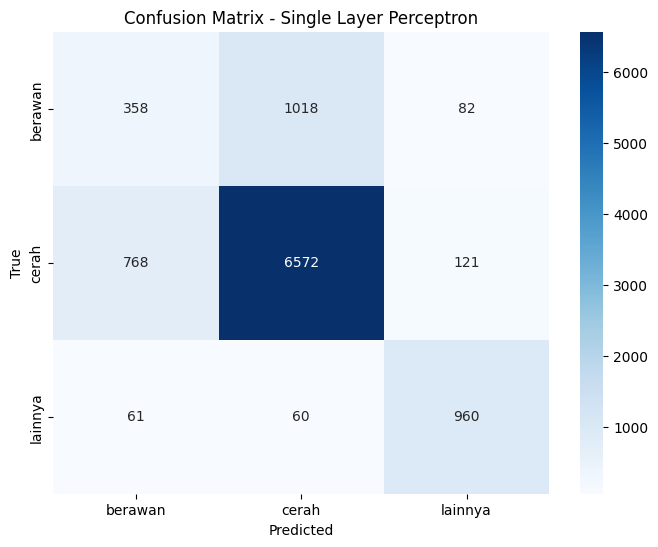

Classification Report - Single Layer Perceptron
              precision    recall  f1-score   support

     berawan       0.30      0.25      0.27      1458
       cerah       0.86      0.88      0.87      7461
     lainnya       0.83      0.89      0.86      1081

    accuracy                           0.79     10000
   macro avg       0.66      0.67      0.67     10000
weighted avg       0.77      0.79      0.78     10000



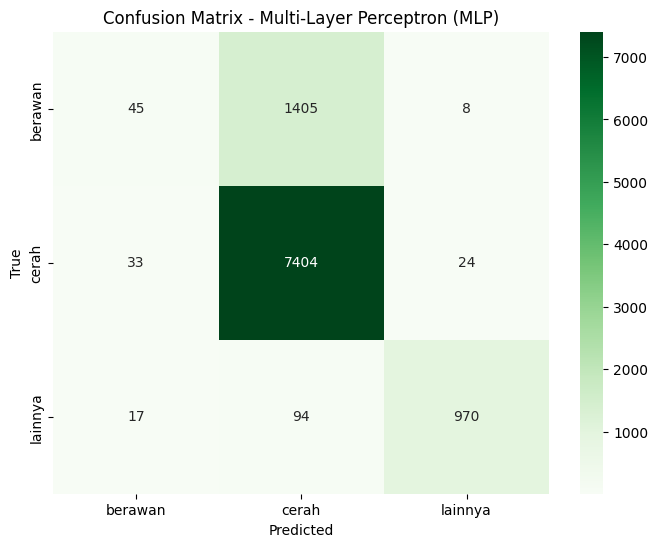

Classification Report - Multi-Layer Perceptron (MLP)
              precision    recall  f1-score   support

     berawan       0.47      0.03      0.06      1458
       cerah       0.83      0.99      0.90      7461
     lainnya       0.97      0.90      0.93      1081

    accuracy                           0.84     10000
   macro avg       0.76      0.64      0.63     10000
weighted avg       0.79      0.84      0.78     10000



In [14]:
# Evaluasi Single Layer Perceptron
cm_perceptron = confusion_matrix(y_test, y_pred_perceptron)
plt.figure(figsize=(8,6))
sns.heatmap(cm_perceptron, annot=True, fmt='d', 
            xticklabels=le.classes_, yticklabels=le.classes_, cmap='Blues')
plt.title('Confusion Matrix - Single Layer Perceptron')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

print("Classification Report - Single Layer Perceptron")
print(classification_report(y_test, y_pred_perceptron, target_names=le.classes_))

# Evaluasi Multi-Layer Perceptron (MLP)
cm_mlp = confusion_matrix(y_test, y_pred_mlp)
plt.figure(figsize=(8,6))
sns.heatmap(cm_mlp, annot=True, fmt='d', 
            xticklabels=le.classes_, yticklabels=le.classes_, cmap='Greens')
plt.title('Confusion Matrix - Multi-Layer Perceptron (MLP)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

print("Classification Report - Multi-Layer Perceptron (MLP)")
print(classification_report(y_test, y_pred_mlp, target_names=le.classes_))
